In [148]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
#read the dataset
dataframe= pd.read_csv('/Users/rekhasreeks/Documents/DataScience/intogithub/support_vector_machine/Social_Network_Ads.csv')

In [150]:
dataframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [151]:
dataframe.shape

(400, 5)

In [152]:
dataframe.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [153]:
dataframe.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [154]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [155]:
dataframe['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

#Visualisation and Analysis of target variable with respect to gender

/Users/rekhasreeks/opt/anaconda3/envs/social_network/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

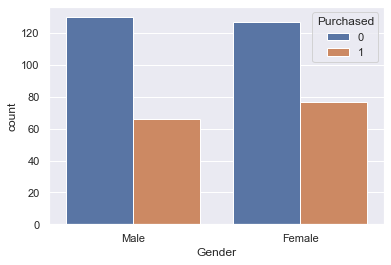

In [156]:
#number of people purchased
sns.countplot('Gender', hue='Purchased' , data= dataframe)

count of both male and female who purchased the Iphone is less.

#ENCODING ACTEGORICAL DATA
##column gender contains categorical data. It shuld be encoded before building the model.

In [157]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
#encode labels in column 'gender'
le=LabelEncoder()
dataframe['Gender']= le.fit_transform(dataframe['Gender'])


In [158]:
dataframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [159]:
dataframe.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


##Visualisation of Traget

(array([257.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 143.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

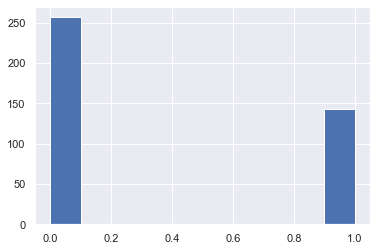

In [160]:

target_column='Purchased'
plt.hist(data=dataframe,x=target_column)

#Visualisation of Age distribution.

<AxesSubplot:xlabel='Age', ylabel='Count'>

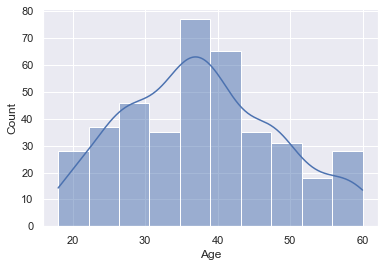

In [161]:
sns.histplot(dataframe['Age'],kde=True)

#Distribution of Estimated salary

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

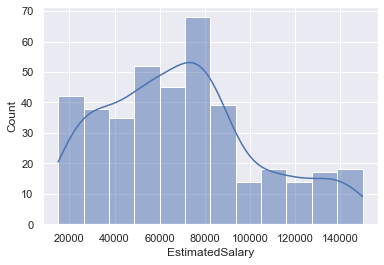

In [162]:
sns.histplot(dataframe['EstimatedSalary'],kde=True)

##from the above histogram it is clear that the distribution is skewed towards 70000 to 90000

From the above histogram it is clear that number of people who purchased is less compared to those who didn't purachse.

##Checking the correlation between differnt variables

In [163]:
corr= dataframe.corr()
corr

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


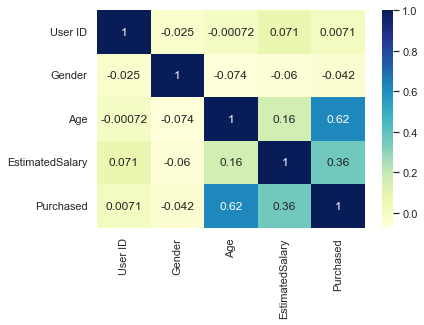

In [164]:
sns.heatmap(dataframe.corr(),  cmap="YlGnBu", annot=True)
plt.show()

From the above heatmap it is clear that the correlation between variables is relatively weak. User Id seesms to have very weak correlation with the target vriable.

In [165]:
#checking the correlation between target variable and features.
corr= pd.DataFrame(dataframe.corr().Purchased)
corr

,Purchased
User ID,0.007120
Gender,-0.042469
Age,0.622454
EstimatedSalary,0.362083
Purchased,1.000000


##the correlation of user Id is very weak with purchased. Hence it has no significance in determining the target.So it the column containing User Id can be dropped.

In [166]:
dataframe=dataframe.drop(['User ID'],axis=1)
dataframe

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


#SPLIT THE DATASET

In [167]:
X=dataframe.iloc[:,:-1]
y=dataframe.iloc[:, 3]

In [168]:
print(X)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]


In [169]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


#TRAIN THE DATASET

In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#FEATURE SCALING
##Feature scaling is done to make sure all the values are on the same scale. It will avoid one feature variable to dominate over the other.

In [171]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#MODEL BUILDING

In [172]:
from sklearn.svm import SVC
model = SVC(kernel= 'linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [173]:
prediction=model.predict(X_test)
prediction


array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8375

In [175]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
cm

array([[42,  6],
       [ 7, 25]])

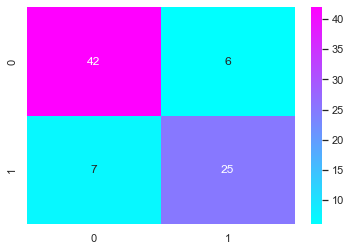

In [176]:
sns.heatmap(cm, annot=True, fmt='d', cmap='cool')
plt.show()

In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        48
           1       0.81      0.78      0.79        32

    accuracy                           0.84        80
   macro avg       0.83      0.83      0.83        80
weighted avg       0.84      0.84      0.84        80



from the above classification report, accuracy score is 84% and recall is 74%. 

In [178]:
model=SVC(kernel='rbf')
model.fit(X_train,y_train)
prediction=model.predict(X_test)
prediction

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [179]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8625

In [180]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
cm

array([[39,  9],
       [ 2, 30]])

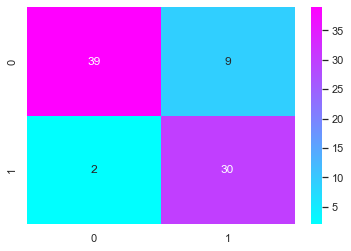

In [181]:
sns.heatmap(cm, annot=True, fmt='d', cmap='cool')
plt.show()

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        48
           1       0.77      0.94      0.85        32

    accuracy                           0.86        80
   macro avg       0.86      0.88      0.86        80
weighted avg       0.88      0.86      0.86        80



##the accuracy is increased to 86% and recall-which is the measure of the model's completeness is 94%. it shows tha ability of the model to correctly classify all the positive instances.